In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pd.set_option('display.max_column', 100)

In [10]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
leads.shape

(9240, 37)

In [12]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [13]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [16]:
leads.describe(include="O")

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [17]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [18]:
leads.isna().sum() / len(leads) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

**As we can see there are lot columns which having high number of missing values.Clearly these columns are not usefull. Since, there are 9000 data points in our data set. So we will eliminate the columns which having the missing values greater then 3000 as they are of no use to us.**

In [19]:
3000 / 9000 * 100

33.33333333333333

In [20]:
# Writing a for loop  to remove columns which have more then 3000 missing values

# for col in leads.columns:
#     if leads[col].isna().sum() > 3000:
#         leads.drop(col, axis=1, inplace=True)

In [21]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [22]:
leads.shape

(9240, 37)

In [23]:
# We can use a fnction to remove the columns which have less the thershold value

In [24]:
def drop_missing_columns(df, thershold):
  # """This function will remove the columns which have the missing values from some thershold
  # so,
  #       df - Dataframe from which we want to remove the columns
  #       thershod - the minmun thershold we will set as criteria"""
    for col in df.columns:
      if df[col].isna().sum() > thershold:
        df.drop(col, axis=1, inplace=True)
    return df

In [25]:
drop_missing_columns(leads, 3000)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Other Metro Cities,No,No,SMS Sent


In [26]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened


In [27]:
# Here we will visulize how the columns will be droped
new_df = pd.read_csv("Leads.csv")
print(f"Before droping the columns: {new_df.shape}")
new_df = drop_missing_columns(new_df, 3000)
print(f"After droping the columns: {new_df.shape}")

Before droping the columns: (9240, 37)
After droping the columns: (9240, 31)


In [28]:
new_df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened


In [29]:
leads.shape

(9240, 31)

In [30]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [31]:
leads["City"].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [32]:
leads["City"].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [33]:
City_mapper = {'Select':"Unknown",
               'Mumbai':"Maharashtra",
                np.nan : "Unknown",
               'Thane & Outskirts':"Maharashtra",
               'Other Metro Cities':"Others",
               'Other Cities':"Others",
               'Other Cities of Maharashtra':"Maharashtra",
               'Tier II Cities':"Others"}

In [34]:
leads["State"]  = leads["City"].replace(City_mapper, regex=True)

In [35]:
leads["State"].value_counts()

State
Maharashtra              3974
Unknown                  3669
Others                   1140
Others of Maharashtra     457
Name: count, dtype: int64

In [36]:
#leads["State"] = leads["State"] == "Others of Maharashtra".replace("Maharashtra")

leads.loc[leads["State"]== "Others of Maharashtra", "State"] = "Maharashtra"

In [37]:
  leads["State"].value_counts()

State
Maharashtra    4431
Unknown        3669
Others         1140
Name: count, dtype: int64

In [38]:
leads.drop("City", axis=1, inplace=True)

In [39]:
leads["State"].isna().sum()

0

In [40]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,State
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Unknown
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Unknown


In [41]:
#Here for City column we created State column by replacing the values

In [42]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [43]:
#Here we will deal with Country column we will use lambda function.

In [44]:
leads["Country"].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [45]:
leads["Country"].value_counts(normalize=False)

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [46]:
leads["Country"].value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

In [47]:
leads["Country_modified"] = leads["Country"].apply(lambda x : "Others" if x != "India" else "India")

In [48]:
leads["Country_modified"].value_counts()

Country_modified
India     6492
Others    2748
Name: count, dtype: int64

In [49]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Unknown,Others
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Unknown,India


In [50]:
leads.drop("Country", axis=1, inplace=True)

In [51]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified,Unknown,Others
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened,Unknown,India


In [52]:
round(leads.isna().sum()/len(leads)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [53]:
for col in leads:
  print(leads[col].astype("category").value_counts())
  print("________________________________________________")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
______

In [54]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [55]:
leads["Lead Profile"].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [56]:
leads["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [57]:
leads["Specialization"].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Here teh Lead profile and How did you hear about us have maxmimun select values which on use it is better to drop those
columns as they will not affect our model

In [58]:
leads.drop(["Lead Profile", "How did you hear about X Education"], axis=1, inplace=True)

In [59]:
leads.shape

(9240, 29)

Here also we can see when we checked value_counts for the columns before most of the columns like  'Do Not Email','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque' For all these columns we could see only one value that is majorly present and for some columns the value is majorly No. It is good to drop all these columns.

In [60]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified'],
      dtype='object')

In [61]:
leads.drop(['Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
            'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [62]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified,Unknown,Others
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened,Unknown,India


In [63]:
leads.shape

(9240, 17)

In [64]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [65]:
leads.drop("What matters most to you in choosing a course", axis=1, inplace=True)

In [66]:
leads.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
State                                        0
Country_modified                             0
dtype: int64

In [67]:
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [68]:
leads["What is your current occupation"].fillna("Other", inplace=True)

In [69]:
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [70]:
leads["What is your current occupation"] = leads["What is your current occupation"].apply(lambda x : "Other" if x == "Housewife" or x == "Businessman" else x)

In [71]:
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Other                   2724
Working Professional     706
Student                  210
Name: count, dtype: int64

In [72]:
leads.loc[leads["What is your current occupation"] == "Others", "What is your current occupation"] = "Other"

In [73]:
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Other                   2724
Working Professional     706
Student                  210
Name: count, dtype: int64

In [74]:
leads.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
State                                        0
Country_modified                             0
dtype: int64

In [75]:
leads = leads[~pd.isnull(leads["TotalVisits"])]

## Here in the above query the rows which are having missing value for the column
# TotalVisits are dropped (WE can do this also)

In [76]:
leads = leads[~pd.isna(leads["Page Views Per Visit"])]

In [77]:
leads = leads[~pd.isna(leads["Last Activity"])]

In [78]:
leads.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
State                                        0
Country_modified                             0
dtype: int64

In [79]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [80]:
leads.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
State                                        0
Country_modified                             0
dtype: int64

In [81]:
leads["Specialization"].value_counts()

Specialization
Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [82]:
leads = leads[~pd.isna(leads["Specialization"])]

In [83]:
leads.isna().sum()


Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
State                                     0
Country_modified                          0
dtype: int64

In [84]:
print(len(leads)/len(leads)*100)
print(len(leads)/9240 * 100)

100.0
82.71645021645023


In [85]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,Others
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,India


In [86]:
#Now The columns Prospect Id and Lead Number of no use so we can remove those columns

In [87]:
leads.drop(["Prospect ID","Lead Number"], axis=1 , inplace=True)

In [88]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,Others
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,India


Now we will conver categorical variabe to Numerical variables

In [89]:
temp = leads.loc[:, leads.dtypes == "object"]

In [90]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified'],
      dtype='object')

In [91]:
for col in temp:
  print(leads[col].value_counts())
  print("_________________________________________")

Lead Origin
Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
_________________________________________
Lead Source
Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
_________________________________________
Do Not Email
No     7030
Yes     613
Name: count, dtype: int64
_________________________________________
Last Activity
Email Opened                    2989
SMS Sent  

In [92]:
for unique_value in leads["State"]:
  leads["State_" + unique_value] = leads["State"].apply(lambda x : 1 if x == unique_value else 0)

In [93]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,Others,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,India,1,0,0


In [94]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,Others,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,India,1,0,0


In [95]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified'],
      dtype='object')

In [96]:
leads["Country_modified"].value_counts()

Country_modified
India     5924
Others    1719
Name: count, dtype: int64

In [97]:
leads["Country_modified"] = leads["Country_modified"].apply(lambda x : 1 if x == "Inida" else 0)

In [98]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,Unknown,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,Unknown,0,1,0,0


In [99]:
leads["A free copy of Mastering The Interview"].value_counts()
# For this above column we will apply Binary encoding as there are only 2 unique values

A free copy of Mastering The Interview
No     4757
Yes    2886
Name: count, dtype: int64

In [100]:
leads["A free copy of Mastering The Interview"] = leads["A free copy of Mastering The Interview"].apply(lambda x : 1 if x == "Yes" else 0)

In [101]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,Unknown,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,Unknown,0,1,0,0


In [102]:
for col in temp:
  print(leads[col].value_counts())
  print("_________________________________________")

Lead Origin
Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
_________________________________________
Lead Source
Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
_________________________________________
Do Not Email
No     7030
Yes     613
Name: count, dtype: int64
_________________________________________
Last Activity
Email Opened                    2989
SMS Sent  

In [103]:
leads["Specialization"].nunique()

19

In [104]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,Unknown,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,Unknown,0,1,0,0


In [105]:
leads.groupby("Specialization")["Converted"].mean().sort_values(ascending=False)

Specialization
Banking, Investment And Insurance    0.489552
Healthcare Management                0.487179
Marketing Management                 0.482382
Operations Management                0.468938
Human Resource Management            0.454002
Finance Management                   0.440042
Business Administration              0.438596
Supply Chain Management              0.427746
Rural and Agribusiness               0.424658
Media and Advertising                0.415842
Hospitality Management               0.405405
Select                               0.405186
IT Projects Management               0.382514
E-Business                           0.368421
International Business               0.352273
Travel and Tourism                   0.351485
E-COMMERCE                           0.351351
Retail Management                    0.340000
Services Excellence                  0.275000
Name: Converted, dtype: float64

In [106]:
speci_mapper = leads.groupby("Specialization")["Converted"].mean().sort_values(ascending=True).index

In [107]:
speci_mapper

Index(['Services Excellence', 'Retail Management', 'E-COMMERCE',
       'Travel and Tourism', 'International Business', 'E-Business',
       'IT Projects Management', 'Select', 'Hospitality Management',
       'Media and Advertising', 'Rural and Agribusiness',
       'Supply Chain Management', 'Business Administration',
       'Finance Management', 'Human Resource Management',
       'Operations Management', 'Marketing Management',
       'Healthcare Management', 'Banking, Investment And Insurance'],
      dtype='object', name='Specialization')

In [108]:
spec_mapper_dict ={key : index for index, key in enumerate(speci_mapper)}

In [109]:
spec_mapper_dict

{'Services Excellence': 0,
 'Retail Management': 1,
 'E-COMMERCE': 2,
 'Travel and Tourism': 3,
 'International Business': 4,
 'E-Business': 5,
 'IT Projects Management': 6,
 'Select': 7,
 'Hospitality Management': 8,
 'Media and Advertising': 9,
 'Rural and Agribusiness': 10,
 'Supply Chain Management': 11,
 'Business Administration': 12,
 'Finance Management': 13,
 'Human Resource Management': 14,
 'Operations Management': 15,
 'Marketing Management': 16,
 'Healthcare Management': 17,
 'Banking, Investment And Insurance': 18}

In [110]:
leads["Specialization"] = leads["Specialization"].map(spec_mapper_dict)

In [111]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,7,Unemployed,0,Modified,Unknown,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,7,Unemployed,0,Email Opened,Unknown,0,1,0,0


In [112]:
temp = leads.loc[:, leads.dtypes == "object"]
for col in temp:
  print(leads[col].value_counts())
  print("_________________________________________")


Lead Origin
Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
_________________________________________
Lead Source
Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
_________________________________________
Do Not Email
No     7030
Yes     613
Name: count, dtype: int64
_________________________________________
Last Activity
Email Opened                    2989
SMS Sent  

In [113]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00


In [114]:
import category_encoders as ce

In [115]:
# encoder = ce.BinaryEncoder(cols=["Do Not Email"])
# leads["Do Not Email"] = encoder.fit_transform(leads)

# Tried to enode with binary encoding but getting error

In [116]:
leads["Do Not Email"].value_counts()

Do Not Email
No     7030
Yes     613
Name: count, dtype: int64

In [117]:
leads["Do Not Email"] = leads["Do Not Email"].apply(lambda x : 1 if x == "Yes" else 0)

In [118]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,Unemployed,0,Modified,Unknown,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,7,Unemployed,0,Email Opened,Unknown,0,1,0,0


In [119]:
temp = leads.loc[:, leads.dtypes == "object"]
for col in temp:
  print(leads[col].value_counts())
  print("_________________________________________")

Lead Origin
Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
_________________________________________
Lead Source
Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
_________________________________________
Last Activity
Email Opened                    2989
SMS Sent                        2524
Page Visited on Website          566
Olark Chat Conversation          463
Conv

In [120]:
for unique_value in leads["What is your current occupation"]:
  leads["Current Ocupation " + unique_value] = leads["What is your current occupation"].apply(lambda x : 1 if x == unique_value else 0)

In [121]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,Unemployed,0,Modified,Unknown,0,1,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,7,Unemployed,0,Email Opened,Unknown,0,1,0,0,1,0,0,0


In [122]:
#leads.drop(columns=["What is your current occupation","Current OcupationUnemployed",	"Current OcupationStudent", "Current OcupationOther",	"Current OcupationWorking Professional"], axis =1 , inplace=True)

In [123]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,Unemployed,0,Modified,Unknown,0,1,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,7,Unemployed,0,Email Opened,Unknown,0,1,0,0,1,0,0,0


In [124]:
temp = leads.loc[:, leads.dtypes == "object"]
for col in temp:
  print(leads[col].value_counts())
  print("_________________________________________")

Lead Origin
Landing Page Submission    4834
API                        2201
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64
_________________________________________
Lead Source
Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
_________________________________________
Last Activity
Email Opened                    2989
SMS Sent                        2524
Page Visited on Website          566
Olark Chat Conversation          463
Conv

In [125]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
One_encoder = OneHotEncoder(sparse=False, drop=None)

In [127]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified', 'State_Unknown', 'State_Maharashtra',
       'State_Others', 'Current Ocupation Unemployed',
       'Current Ocupation Student', 'Current Ocupation Other',
       'Current Ocupation Working Professional'],
      dtype='object')

In [128]:
encoded_array = One_encoder.fit_transform(leads[["Lead Origin"]])
print(encoded_array)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [129]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# # Sample DataFrame
# leads = pd.DataFrame({
#     'Do Not Email': ['Yes', 'No', 'Yes', 'No', 'Yes']
# })
# print("Original DataFrame:")
# print(leads)

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop=None)

# # Fit and transform the data
# encoded_array = encoder.fit_transform(leads[['Do Not Email']])

# # Create a DataFrame with the encoded data
# leads_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Do Not Email']))
# print("\nDataFrame with One Hot Encoding:")
# print(leads_encoded)

In [130]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,Unemployed,0,Modified,Unknown,0,1,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,7,Unemployed,0,Email Opened,Unknown,0,1,0,0,1,0,0,0


In [131]:
lead_origin_dp = pd.DataFrame(encoded_array, columns=One_encoder.get_feature_names_out(["Lead Origin"]))

In [132]:
leads = pd.merge(leads, lead_origin_dp, left_index=True, right_index=True)

In [133]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,Unemployed,0,Modified,Unknown,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,7,Unemployed,0,Email Opened,Unknown,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0


In [134]:
leads.drop("What is your current occupation", axis=1, inplace=True)

In [135]:
leads.drop("Lead Origin", axis=1, inplace=True)

In [136]:
temp = leads.loc[:, leads.dtypes == "object"]
for col in temp:
  print(leads[col].value_counts())
  print("_________________________________________")

Lead Source
Google               2170
Direct Traffic       1928
Organic Search        835
Olark Chat            759
Reference             374
Welingak Website      111
Referral Sites         82
Facebook               28
google                  5
Click2call              4
bing                    3
Live Chat               2
Press_Release           2
WeLearn                 1
Social Media            1
blog                    1
welearnblog_Home        1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: count, dtype: int64
_________________________________________
Last Activity
Email Opened                    2530
SMS Sent                        2042
Page Visited on Website          484
Olark Chat Conversation          378
Converted to Lead                278
Email Bounced                    196
Email Link Clicked               172
Form Submitted on Website         93
Unreachable                       73
Unsubscribed                      40
Had a Phone Conv

In [137]:
leads.drop("State", axis=1, inplace=True)

In [138]:
leads.head(2)

,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,0,Modified,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0
1,Organic Search,0,0,5.0,674,2.5,Email Opened,7,0,Email Opened,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0


In [139]:
dummy = pd.get_dummies(leads[["Lead Source","Last Activity","Last Notable Activity"]], drop_first=True, dtype="int8")

In [140]:
dummy

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7639,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7640,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7641,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [141]:
leads = pd.concat([leads, dummy], axis=1)

In [142]:
leads.head(2)

,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,7,0,Modified,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Organic Search,0,0,5.0,674,2.5,Email Opened,7,0,Email Opened,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [143]:
leads.drop(["Lead Source","Last Activity","Last Notable Activity"], axis=1, inplace=True)

In [144]:
leads.head(2)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [145]:
X = leads.drop("Converted", axis=1)

In [146]:
y = leads["Converted"]

In [147]:
X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [148]:
y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [149]:
y.shape

(6310,)

In [150]:
X.shape

(6310, 62)

In [151]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,12,1,0,0,1,0,0,1,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,9,0,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,7,0,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [153]:
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7080,0,0.0,0,0.0,7,0,0,1,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3523,0,2.0,130,1.0,12,1,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6281,0,4.0,1577,4.0,13,0,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7317,0,6.0,277,2.0,13,1,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7438,0,6.0,1104,6.0,6,1,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,0,4.0,104,2.0,13,1,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
93,0,9.0,838,4.5,17,0,0,0,1,0,0,0,1,0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4822,0,5.0,1826,2.5,16,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7202,0,2.0,1764,2.0,14,1,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [154]:
X_test

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
387,0,15.0,753,15.0,18,1,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7532,0,4.0,449,4.0,14,1,0,0,1,0,0,0,1,0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6345,0,2.0,1015,2.0,1,1,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3406,0,0.0,0,0.0,7,0,0,1,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6288,0,3.0,147,1.5,7,0,0,1,0,0,0,1,0,0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4504,0,5.0,1063,2.5,13,0,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4292,0,2.0,1240,1.0,6,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1570,0,0.0,0,0.0,14,0,0,1,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1900,0,2.0,1227,1.0,7,0,0,1,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [155]:
y_train

7080    1
3523    0
6281    0
7317    0
7438    1
       ..
7284    0
93      0
4822    1
7202    1
6840    1
Name: Converted, Length: 4417, dtype: int64

In [156]:
y_test

387     0
7532    0
6345    0
3406    1
6288    0
       ..
4504    1
4292    1
1570    1
1900    1
4621    0
Name: Converted, Length: 1893, dtype: int64

In [157]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4417, 62), (1893, 62), (4417,), (1893,))

## Scaling the Numeric features

In [158]:
# Now there are few numerical variables present in the dataset that needs to be So here we will scale those variables

In [159]:
"""Normalization (Min-Max Scaling): Scales data to a fixed range, usually [0, 1].
Standardization (Z-score Normalization): Scales data to have mean 0 and standard deviation 1.
Robust Scaling: Scales data using median and IQR, robust to outliers.
MaxAbs Scaling: Scales data by the maximum absolute value.
Unit Vector Transformation: Scales feature vectors to have unit norm."""

'Normalization (Min-Max Scaling): Scales data to a fixed range, usually [0, 1].\nStandardization (Z-score Normalization): Scales data to have mean 0 and standard deviation 1.\nRobust Scaling: Scales data using median and IQR, robust to outliers.\nMaxAbs Scaling: Scales data by the maximum absolute value.\nUnit Vector Transformation: Scales feature vectors to have unit norm.'

In [160]:
# Importing MinMax Scaler

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()

In [163]:
X_train[["TotalVisits", "Page Views Per Visit","Total Time Spent on Website","Specialization"]] = scaler.fit_transform(X_train[["TotalVisits", "Page Views Per Visit","Total Time Spent on Website","Specialization"]])

In [164]:
X_train.head(5)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7080,0,0.000000,0.000000,0.000000,0.388889,0,0,1,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3523,0,0.014184,0.057218,0.018182,0.666667,1,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6281,0,0.028369,0.694102,0.072727,0.722222,0,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7317,0,0.042553,0.121919,0.036364,0.722222,1,0,0,1,0,1,0,0,0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7438,0,0.042553,0.485915,0.109091,0.333333,1,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [165]:
leads.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Country_modified,State_Unknown,State_Maharashtra,State_Others,Current Ocupation Unemployed,Current Ocupation Student,Current Ocupation Other,Current Ocupation Working Professional,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.156781,0.045295,-0.055154,0.037683,-0.068913,0.059150,NaN,-0.049332,0.013044,0.044761,-0.054243,-0.007585,0.104337,-0.050471,-0.013686,0.025703,-0.021774,-0.005649,0.101987,-0.018743,-0.069920,-0.004999,-0.040160,0.030546,-0.003535,0.063425,-0.044679,-0.005328,-0.003535,-0.003535,-0.000507,-0.006123,-0.003535,0.013737,-0.003535,-0.003535,0.044845,-0.057303,0.599144,-0.043256,-0.222225,-0.019176,-0.001199,-0.037508,0.104441,-0.032783,0.020882,0.261483,-0.007071,-0.003535,0.311856,-0.033318,-0.193393,-0.003535,-0.010003,0.133975,-0.009016,0.060205,-0.046213,-0.004996,0.246190,-0.003535
Converted,-0.156781,1.000000,-0.020830,0.320173,-0.093833,0.071741,-0.103985,NaN,0.060254,-0.033804,-0.029676,0.027948,-0.013572,-0.248373,0.302649,0.005973,0.000919,-0.016120,0.021140,-0.129419,-0.015629,-0.009082,0.020188,-0.008944,-0.030510,-0.011105,-0.015705,0.262937,-0.022227,0.014274,0.014274,0.146852,-0.004582,-0.011105,-0.024838,-0.011105,-0.011105,-0.011105,-0.122417,-0.133985,-0.035824,-0.050208,-0.054857,0.029104,-0.136497,-0.104171,0.322633,-0.044637,-0.030198,-0.009522,-0.011105,-0.044132,-0.022750,-0.038882,-0.011105,0.031417,-0.261201,-0.042750,-0.039168,0.360302,0.024147,-0.023809,-0.011105
TotalVisits,0.045295,-0.020830,1.000000,0.163408,0.452882,0.058713,0.163845,NaN,-0.225216,0.171981,0.047105,-0.042314,-0.037167,0.086529,-0.028562,-0.013613,0.016382,-0.006175,-0.001395,0.065650,-0.042683,0.069095,-0.012813,-0.221930,0.156733,-0.001988,0.017192,-0.164911,0.084062,-0.004345,-0.004345,-0.090194,-0.004805,0.000369,0.009262,0.002727,-0.004345,0.000369,-0.073511,-0.045372,-0.013856,0.000699,0.005313,0.010572,-0.064112,0.217516,-0.044265,0.013441,0.000101,0.020780,0.000369,-0.008017,-0.001855,0.014608,-0.004345,0.014387,-0.073825,-0.002414,0.230658,-0.036541,0.005878,0.000303,0.009798
Total Time Spent on Website,-0.055154,0.320173,0.163408,1.000000,0.260458,0.112327,0.132776,NaN,-0.229557,0.174670,0.048889,-0.025659,-0.030893,-0.006640,0.068446,0.003857,0.004909,-0.022533,0.034448,0.103598,-0.062220,0.188117,-0.017127,-0.289466,0.061738,-0.009271,0.008729,-0.195758,0.015206,0.009283,0.014779,-0.113163,-0.012782,0.003265,0.001157,-0.005206,-0.003752,-0.001050,-

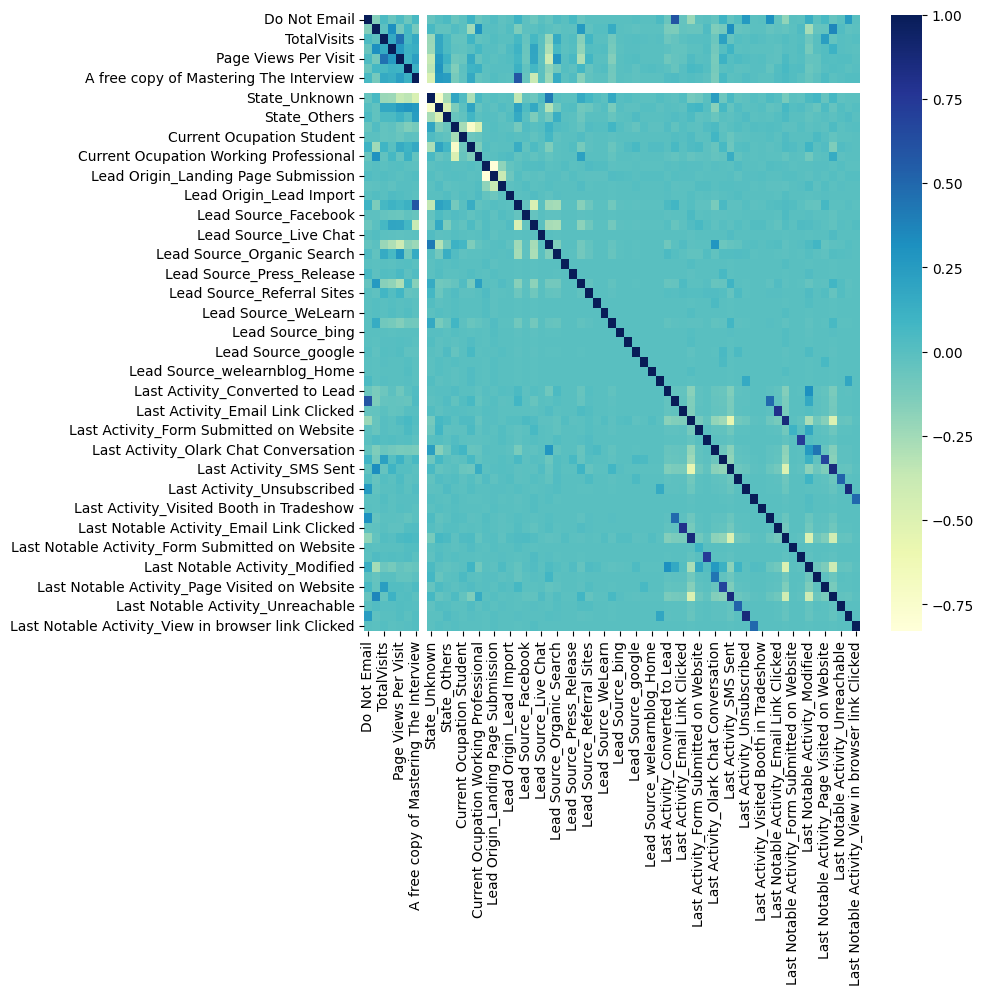

In [166]:
plt.figure(figsize=(8,8))
sns.heatmap(leads.corr(), cmap="YlGnBu")
plt.show()

# Model Building Using Logestic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lmodel = LogisticRegression()

In [169]:
lmodel.fit(X_train, y_train)

LogisticRegression()

In [170]:
lmodel.predict_proba(X_train)

array([[0.30953082, 0.69046918],
       [0.79130974, 0.20869026],
       [0.17989961, 0.82010039],
       ...,
       [0.1007375 , 0.8992625 ],
       [0.20591836, 0.79408164],
       [0.30953082, 0.69046918]])

In [171]:
y_train

7080    1
3523    0
6281    0
7317    0
7438    1
       ..
7284    0
93      0
4822    1
7202    1
6840    1
Name: Converted, Length: 4417, dtype: int64

In [172]:
y_train_predict = lmodel.predict(X_train)

In [173]:
y_train_predict

array([1, 0, 1, ..., 1, 1, 1])

In [174]:
y_train_array = y_train.to_numpy()
print(np.concatenate((y_train_predict.reshape(len(y_train_predict),1), y_train_array.reshape(len(y_train.array),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [175]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

In [219]:
ac = accuracy_score(y_train, y_train_predict)
print(f"The accuracy score which we got from the model is {ac: .2f}, if we want to mention in percentage it is {ac*100 : .2f}")
print("The r2_score of our model is: ",r2_score(y_train, y_train_predict))


The accuracy score which we got from the model is  0.81, if we want to mention in percentage it is  80.78
The r2_score of our model is:  0.21944269948059048


In [177]:
print(confusion_matrix(y_train, y_train_predict))

[[2126  353]
 [ 496 1442]]


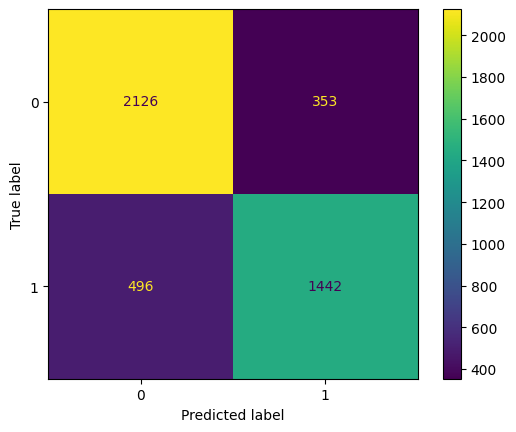

In [178]:
# Visulaizing our confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lmodel, X_train, y_train)
plt.show()


In [179]:
# We will test our model on Test Data we created

In [185]:
X_test[["TotalVisits", "Page Views Per Visit","Total Time Spent on Website","Specialization"]] = scaler.fit_transform(X_test[["TotalVisits", "Page Views Per Visit","Total Time Spent on Website","Specialization"]])

In [186]:
y_pred = lmodel.predict(X_test)

In [187]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [188]:
y_test_array = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_array.reshape(len(y_test_array),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [189]:
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy score which we got from the model is {ac}, if we want to mention in percentage it is {ac*100}")
print("The r2_score of our model is: ",r2_score(y_test, y_pred))


The accuracy score which we got from the model is 0.8040147913365029, if we want to mention in percentage it is 80.40147913365028
The r2_score of our model is:  0.20248123459874434


In [192]:
print(confusion_matrix(y_pred, y_test))

[[939 240]
 [131 583]]


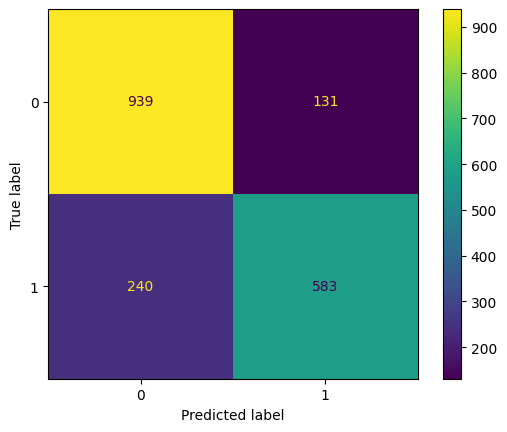

In [196]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lmodel, X_test, y_test)
plt.show()


In [198]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [201]:
print("Recall",recall_score(y_test, y_pred))
print("Precision",precision_score(y_test, y_pred))

print("F1_Score",f1_score(y_test, y_pred))

Recall 0.7083839611178615
Precision 0.8165266106442577
F1_Score 0.7586206896551724


In [213]:
import sklearn.metrics as metrics
def draw_roc(actual, prob):
  fpr, tpr, thershold = metrics.roc_curve(actual, prob)
  auc_score = metrics.roc_auc_score(actual, prob)
  plt.figure(figsize=(6,5))
  plt.plot(fpr, tpr, label="ROC_curve(are = %0.2f)" % auc_score)
  plt.plot([0,1], [0,1], "k--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic")
  plt.legend(loc="lower right")
  plt.show()
  return None


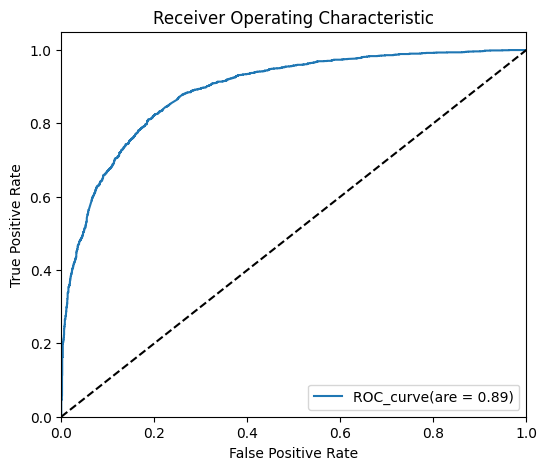

In [214]:
draw_roc(y_train, lmodel.predict_proba(X_train)[:,1])
#draw_roc(y_test, model.predict_proba(X_test)[:,1])

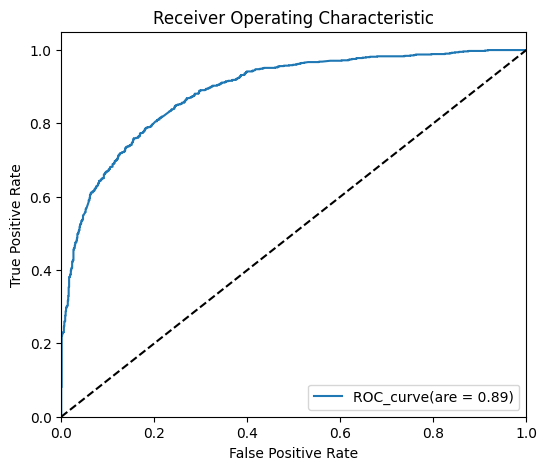

In [218]:
draw_roc(y_test, lmodel.predict_proba(X_test)[:,1])